In [1]:
#After predicting disordered residues with iupred,
#each string of contiguous disordered residues was
#saved an item in a dictionary. Likewise, there is 
#a dictionary for all ordered domains and a
#dictionary that contains the entirety of every
#proteins sequence proteome-wide. These dictionaries
#were then exported as a pickle bundle which this
#bit of code unpacks and converts to a dictinary.

import pickle as pkl

disorderdictionary = open('UP000000803DisorderDict.pkl', 'rb')
ProteomeDisorderDict = pkl.load(disorderdictionary)

orderdictionary = open('UP000000803OrderDict.pkl', 'rb')
ProteomeOrderDict = pkl.load(orderdictionary)

proteomedictionary = open('UP000000803ProteomeDict.pkl', 'rb')
ProteomeDict =  pkl.load(proteomedictionary)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def residue_distance(protein_dictionary, residue_list):
    #finds the average distance between residues specified in the residue_list in amino acids
    average = {}
    for protein in protein_dictionary:
        distance = 0
        sequence = protein_dictionary[protein]
        values = []
        if len(sequence) > 100:
            while sequence:
                if sequence[0] in residue_list:
                    values.append(distance)
                    distance = 0
                    sequence = sequence[1:]
                else:
                    distance += 1
                    sequence = sequence[1:]
            if len(values) <= 2:
                average[protein] = 0
            else:
                average[protein] = (sum(values) - values[0] - values[-1]) / (len(values) - 2)
    return average

def nested_residue_distance(nested_dict, residue_list):
    #takes in a nested dictionary of many sequences and finds the average of each sequence
    nested_average = {}
    for protein in nested_dict:
        subseq_dictionary_average = residue_distance(nested_dict[protein], residue_list)
        nested_average[protein] = subseq_dictionary_average
    return nested_average

def dictionary_to_list(dict):
    data_points = []
    for key in dict:
        data_points.append(dict[key])
    return data_points

def nested_dictionary_to_list(nested_dict):
    data_points = []
    for key in nested_dict:
        nested_list = dictionary_to_list(nested_dict[key])
        data_points.extend(nested_list)
    return data_points

In [3]:
def fraction_composition(sequence, aa_list):
    #takes in sequence and finds percent composition of the given amino acids
    total = 0
    length = len(sequence)
    while sequence:
        if sequence[0] in aa_list:
            total += 1
            sequence = sequence[1:]
        else:
            sequence = sequence[1:]
    return total / length

dmcdt1 = 'MAQPSVAAFFTNRKRAALDDAISIKNRRLVEPAETVSPASAPSQLPAGDQDADLDTLKAAATGMRTRSGRTARLIVTAAQESKKKTPAAAKMEPHIKQPKLVQFIKKGTLSPRKQAQSSKLDEEELQQSSAISEHTPKVNFTITSQQNADNVQRGLRTPTKQILKDASPIKADLRRQLTFDEVKTKVSRSAKLQELKAVLALKAALEQKRKEQEERNRKLRDAGPSPSKSKMSVQLKEFDTIELEVLISPLKTFKTPTKIPPPTPDKHELMSPRHTDVSKRLLFSPAKNGSPVKLVE'

fly_bulky_hydrophobics = fraction_composition(dmcdt1, ['L', 'I', 'V', 'F', 'Y', 'W'])
fly_positive = fraction_composition(dmcdt1, ['K', 'R'])
fly_proline = fraction_composition(dmcdt1, ['P'])

print(fly_bulky_hydrophobics, fly_positive, fly_proline)

def dictionary_composition_filter(dict, percent, aa_list):
    #takes in a percent composition and creates a new dictionary with proteins that match the composition
    percent_comp_dict = {}
    for key in dict:
        if fraction_composition(dict[key], aa_list) >= percent - (percent * 0.05) and fraction_composition(dict[key], aa_list) <= percent + (percent * 0.05):
            percent_comp_dict[key] = dict[key]
    return percent_comp_dict

def nested_dictionary_composition_filter(nested_dict, percent, aa_list):
    #takes in nested dictionaries
    nested_percent_comp_dict = {}
    for protein in nested_dict:
        subseq_dictionary_average = dictionary_composition_filter(nested_dict[protein], percent, aa_list)
        nested_percent_comp_dict[protein] = subseq_dictionary_average
    return nested_percent_comp_dict

0.21212121212121213 0.18518518518518517 0.07744107744107744


254


<ipython-input-4-9454216399fc>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Entire Proteome', '', 'Ordered Proteome', '', 'Disordered Proteome'])


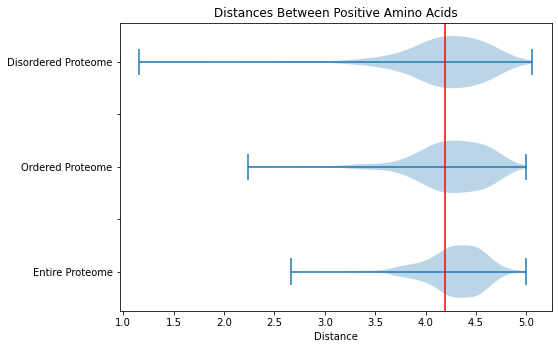

In [4]:
filtered_proteome_positive = dictionary_composition_filter(ProteomeDict, fly_positive, ['R', 'K'])
filtered_ordered_proteome_positive = nested_dictionary_composition_filter(ProteomeOrderDict, fly_positive, ['R', 'K'])
filtered_disordered_proteome_positive = nested_dictionary_composition_filter(ProteomeDisorderDict, fly_positive, ['R', 'K'])

drosophila_proteome_positive_average = residue_distance(filtered_proteome_positive, ['R', 'K'])
drosophila_ordered_proteome_positive_average = nested_residue_distance(filtered_ordered_proteome_positive, ['R', 'K'])
drosophila_disordered_proteome_positive_average = nested_residue_distance(filtered_disordered_proteome_positive, ['R', 'K'])

positive_data_points = dictionary_to_list(drosophila_proteome_positive_average)
ordered_positive_average = nested_dictionary_to_list(drosophila_ordered_proteome_positive_average)
disordered_positive_average = nested_dictionary_to_list(drosophila_disordered_proteome_positive_average)

print(len(positive_data_points))
    
data_to_plot = [positive_data_points, ordered_positive_average, disordered_positive_average]

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

bp = ax.violinplot(data_to_plot, vert=False)

ax.set_yticklabels(['', 'Entire Proteome', '', 'Ordered Proteome', '', 'Disordered Proteome'])

#DmCdt1 line
plt.axvline(x=4.188679245283019, color='r')
plt.xlabel('Distance')
plt.title('Distances Between Positive Amino Acids')

plt.show()

#plt.savefig('Drosophila Proteome Positive Distance Violin Plot.png', bbox_inches='tight')

<ipython-input-5-4329d6f150de>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Entire Proteome', '', 'Ordered Proteome', '', 'Disordered Proteome'])


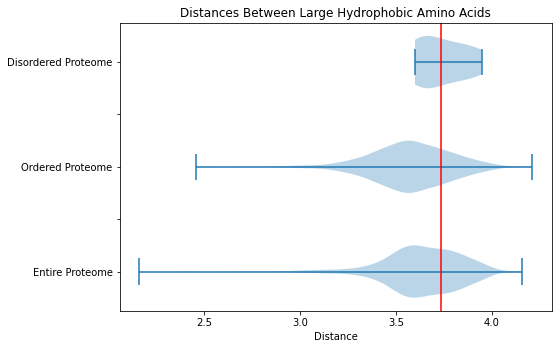

In [5]:
filtered_proteome_hydrophobic = dictionary_composition_filter(ProteomeDict, fly_bulky_hydrophobics, ['L', 'I', 'F', 'Y', 'W'])
filtered_ordered_proteome_hydrophobic = nested_dictionary_composition_filter(ProteomeOrderDict, fly_bulky_hydrophobics, ['L', 'I', 'F', 'Y', 'W'])
filtered_disordered_proteome_hydrophobic = nested_dictionary_composition_filter(ProteomeDisorderDict, fly_bulky_hydrophobics, ['L', 'I', 'F', 'Y', 'W'])

drosophila_proteome_hydrophobic_average = residue_distance(filtered_proteome_hydrophobic, ['L', 'I', 'F', 'Y', 'W'])
drosophila_ordered_proteome_hydrophobic_average = nested_residue_distance(filtered_ordered_proteome_hydrophobic, ['L', 'I', 'F', 'Y', 'W'])
drosophila_disordered_proteome_hydrophobic_average = nested_residue_distance(filtered_disordered_proteome_hydrophobic, ['L', 'I', 'F', 'Y', 'W'])

hydrophobic_data_points = dictionary_to_list(drosophila_proteome_hydrophobic_average)
ordered_hydrophobic_average = nested_dictionary_to_list(drosophila_ordered_proteome_hydrophobic_average)
disordered_hydrophobic_average = nested_dictionary_to_list(drosophila_disordered_proteome_hydrophobic_average)

data_to_plot = [hydrophobic_data_points, ordered_hydrophobic_average, disordered_hydrophobic_average]

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

bp = ax.violinplot(data_to_plot, vert=False)

ax.set_yticklabels(['', 'Entire Proteome', '', 'Ordered Proteome', '', 'Disordered Proteome'])

#DmCdt1 line
plt.axvline(x=3.737704918032787, color='r')

plt.xlabel('Distance')
plt.title('Distances Between Large Hydrophobic Amino Acids')

plt.show()

#plt.savefig('Drosophila Proteome Large Hydrophobics Distance Violin Plot.png', bbox_inches='tight')

<ipython-input-6-affb1d916901>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Entire Proteome', '', 'Ordered Proteome', '', 'Disordered Proteome'])


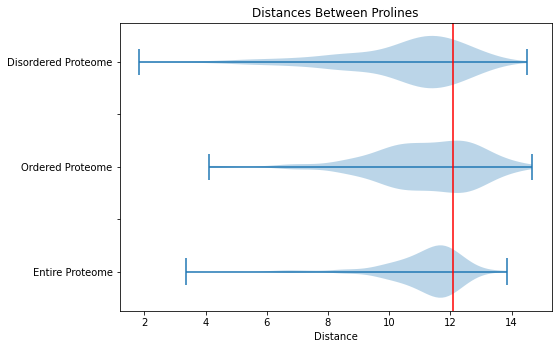

In [6]:
filtered_proteome_proline = dictionary_composition_filter(ProteomeDict, fly_proline, ['P'])
filtered_ordered_proteome_proline = nested_dictionary_composition_filter(ProteomeOrderDict, fly_proline, ['P'])
filtered_disordered_proteome_proline = nested_dictionary_composition_filter(ProteomeDisorderDict, fly_proline, ['P'])

drosophila_proteome_proline_average = residue_distance(filtered_proteome_proline, ['P'])
drosophila_ordered_proteome_proline_average = nested_residue_distance(filtered_ordered_proteome_proline, ['P'])
drosophila_disordered_proteome_proline_average = nested_residue_distance(filtered_disordered_proteome_proline, ['P'])

proline_data_points = dictionary_to_list(drosophila_proteome_proline_average)
ordered_proline_average = nested_dictionary_to_list(drosophila_ordered_proteome_proline_average)
disordered_proline_average = nested_dictionary_to_list(drosophila_disordered_proteome_proline_average)

data_to_plot = [proline_data_points, ordered_proline_average, disordered_proline_average]

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

bp = ax.violinplot(data_to_plot, vert=False)

ax.set_yticklabels(['', 'Entire Proteome', '', 'Ordered Proteome', '', 'Disordered Proteome'])

#DmCdt1 line
plt.axvline(x=12.090909090909092, color='r')

plt.xlabel('Distance')
plt.title('Distances Between Prolines')

plt.show()

#plt.savefig('Drosophila Proteome Proline Distance Violin Plot.png', bbox_inches='tight')

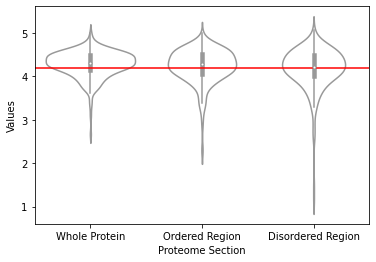

In [23]:
positive_dataframe = pd.DataFrame({'Values': positive_data_points})
order_positive_dataframe = pd.DataFrame({'Values': ordered_positive_average})
disorder_positive_dataframe = pd.DataFrame({'Values': disordered_positive_average})

positive_dataframe['Proteome Section'] = 'Whole Protein'
order_positive_dataframe['Proteome Section'] = 'Ordered Region'
disorder_positive_dataframe['Proteome Section'] = 'Disordered Region'

positive_combined_dataframe = positive_dataframe.append([order_positive_dataframe, disorder_positive_dataframe])

sns.violinplot(x='Proteome Section', y='Values', data=positive_combined_dataframe, color='white')
plt.axhline(y=4.188679245283019, color='r')

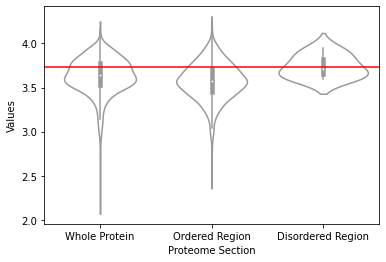

In [24]:
hydrophobic_dataframe = pd.DataFrame({'Values': hydrophobic_data_points})
order_hydrophobic_dataframe = pd.DataFrame({'Values': ordered_hydrophobic_average})
disorder_hydrophobic_dataframe = pd.DataFrame({'Values': disordered_hydrophobic_average})

hydrophobic_dataframe['Proteome Section'] = 'Whole Protein'
order_hydrophobic_dataframe['Proteome Section'] = 'Ordered Region'
disorder_hydrophobic_dataframe['Proteome Section'] = 'Disordered Region'

hydrophobic_combined_dataframe = hydrophobic_dataframe.append([order_hydrophobic_dataframe, disorder_hydrophobic_dataframe])

sns.violinplot(x='Proteome Section', y='Values', data=hydrophobic_combined_dataframe, color='white')
plt.axhline(y=3.737704918032787, color='r')

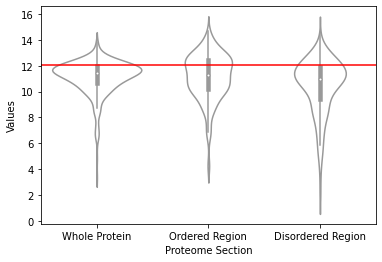

In [25]:
proline_dataframe = pd.DataFrame({'Values': proline_data_points})
order_proline_dataframe = pd.DataFrame({'Values': ordered_proline_average})
disorder_proline_dataframe = pd.DataFrame({'Values': disordered_proline_average})

proline_dataframe['Proteome Section'] = 'Whole Protein'
order_proline_dataframe['Proteome Section'] = 'Ordered Region'
disorder_proline_dataframe['Proteome Section'] = 'Disordered Region'

proline_combined_dataframe = proline_dataframe.append([order_proline_dataframe, disorder_proline_dataframe])

sns.violinplot(x='Proteome Section', y='Values', data=proline_combined_dataframe, color='white')
plt.axhline(y=12.090909090909092, color='r')